## Разведочный анализ
#### Исследование аудитории трех сообществ в ВКонтакте, посвященных компьютерным играм

- Федерация компьютерного спорта России - https://vk.com/resf
- CYBERSHOKE - https://vk.com/cybershoke
- MoreGames - https://vk.com/moregamez

### Подготовка данных

In [2]:
# Загружаем необходимые библиотеки

import datetime                  # Пакет для работы с временными форматами
import pickle                    # Пакет для подгрузки данных специфического для питона формата
import requests                  # Пакет для скачки данных из этих ваших интернетов
import pandas as pd              # Пакет для работы с таблицами
import numpy as np               # Пакет для работы с векторами и матрицами
import matplotlib.pyplot as plt  # Пакет для строительства графиков
import time            # Пакет для работы со временем. Например, помогает ставить заглушки 
                       # time.sleep(секунды), необходимые для того что ВК не банил нащего
                       # сборщика данных из-за слишком частых запросов
        
# Пакет для красивых циклов. При желании его можно отключить. Тогда из всех циклов придётся 
# удалять команду tqdm_notebook.
from tqdm import tqdm_notebook   # подробнее: https://github.com/tqdm/tqdm

In [3]:
# мой номер странички
with open ('user_id.txt') as p:
    my_user_id = p.read
# версия используемого API
version = '5.103' 
# подгружаем токен
with open('токен.txt') as f:
    token = f.read()

In [4]:
url = "https://api.vk.com/method/users.get?user_ids={user_id}&access_token={token}&v={version}"
url = url.format(user_id=my_user_id, token=token, version=version)

In [5]:
response = requests.get(url) 
response

<Response [200]>

In [66]:
def vkDownload(method, parameters, token=token, version=version):
    """
        Возвращает результат запроса по методу
        
        method: string
            метод из документации, который хотим использовать
            
        parameters: string
            параметры используемого метода
            
        token: string
            токен Oauth доступа
        
        version: string
            версия API
    """
    
    # составляем ссылку
    url = 'https://api.vk.com/method/{method}?{parameters}&access_token={token}&v={version}'
    url = url.format(method=method, parameters=parameters, token=token, version=version)
    # запрашиваем ссылку и переводим в json (словарь)
    response = requests.get(url).json()
    
    return response

In [67]:
with open('токен.txt') as f:
    token = f.read()

In [68]:
wall = vkDownload('wall.get','user_ids=466261108')
wall

{'response': {'count': 5,
  'items': [{'inner_type': 'wall_wallpost',
    'copy_history': [{'inner_type': 'wall_wallpost',
      'type': 'post',
      'attachments': [{'type': 'photo',
        'photo': {'album_id': -7,
         'date': 1661408427,
         'id': 457286759,
         'owner_id': -118281792,
         'access_key': '0a1ccc4ca50537be48',
         'post_id': 159149,
         'sizes': [{'height': 46,
           'type': 's',
           'width': 75,
           'url': 'https://sun9-39.userapi.com/impg/lROP7JtyRkFst6bLNzwOLDWg-SFLZjNCpxUbeg/B61jqI1MbXw.jpg?size=75x46&quality=95&sign=7bd152c0db66f0d8815198b4d9264708&c_uniq_tag=i2f1uO_fXin5gIXQtC_2O15awnf_bJlkIoPdfQTuZSo&type=album'},
          {'height': 81,
           'type': 'm',
           'width': 130,
           'url': 'https://sun9-39.userapi.com/impg/lROP7JtyRkFst6bLNzwOLDWg-SFLZjNCpxUbeg/B61jqI1MbXw.jpg?size=130x81&quality=95&sign=257751f36a5435ffa79aef36297390fa&c_uniq_tag=s96I8_XSxNfl1vgvZ5ColXg5e_6uoHUykpuGKLGcnCE&type=

In [69]:
group_id = '-65919870'

wall = vk_download1('wall.get','owner_id=' + group_id)
wall.keys()

dict_keys(['count', 'items'])

In [70]:
wall['count']

19333

In [71]:
len(wall['items'])

20

In [13]:
from tqdm import tqdm_notebook
import time

n = vk_download1('wall.get','owner_id=' + group_id)['count']
n

19333

In [14]:
infa = { 
    'id': [ ],
    'text': [ ],
    'likes': [ ],
}

for i in tqdm_notebook(range(0, 1000, 100)):
    time.sleep(0.4)
    wall = vk_download1('wall.get','owner_id=' + group_id + \
                       '&count=100&offset=' + str(i)
                      )['items']
    
    infa['likes'].extend([item['likes']['count'] for item in wall])
    infa['id'].extend([item['id'] for item in wall])
    infa['text'].extend([item['text'] for item in wall])
    
df = pd.DataFrame(infa)
df.head()

C:\Users\Александра\AppData\Local\Temp\ipykernel_23568\2258335266.py:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(0, 1000, 100)):


  0%|          | 0/10 [00:00<?, ?it/s]

,id,text,likes
0,547418,ФИНАЛ ДОРОГИ ДО ГЛОБАЛА В НАПАРНИКАХ CS2\nРоли...,8
1,547483,🔥Концепт скина на гранату,12
2,547481,😅Зашел поиграть в Китайскую версию CS)),26
3,547477,🔥😍Это великолепно,13
4,547474,🔥👍Положение команд во всех рейтингах,12


In [15]:
wall = vk_download1('wall.get','owner_id=' + group_id + \
                       '&count=100&offset=' + str(i)
                      )
wall

{'count': 19333,
 'items': [{'inner_type': 'wall_wallpost',
   'comments': {'can_post': 1, 'count': 2, 'groups_can_post': True},
   'marked_as_ads': 0,
   'hash': 'j1NkUN-JE5g9Ms9jJJzDUozTHO1r',
   'type': 'post',
   'attachments': [{'type': 'video',
     'video': {'response_type': 'full',
      'access_key': '1dd782d3616b7a6d1e',
      'can_comment': 1,
      'can_like': 1,
      'can_repost': 1,
      'can_subscribe': 1,
      'can_add_to_faves': 1,
      'can_add': 1,
      'comments': 2,
      'date': 1703882954,
      'description': '',
      'duration': 8,
      'image': [{'url': 'https://sun9-11.userapi.com/ADRBE8KK20oEofFbZ9PQr-7DHOkAw7_rAxoedQ/FxSGVcBSudw.jpg',
        'width': 130,
        'height': 96,
        'with_padding': 1},
       {'url': 'https://sun9-12.userapi.com/3lqiCFTjTD3t_9mrySdc9jHxc5WcbdEjU3Wh5A/dCvKNJ1CMlI.jpg',
        'width': 160,
        'height': 120,
        'with_padding': 1},
       {'url': 'https://sun9-45.userapi.com/RrJhWCLOodIuTMKjJTE0XnZj8jeI4Mo

### Сбор данных сообществ

In [22]:
# Основные параметры, которые мы хотим получить
fields = 'bdate, city, home_town, sex'
group_id = '-65919870'

In [30]:
games_groups = {
    'Федерация компьютерного спорта России' : 'resf',
    'CYBERSHOKE' : 'cybershoke',
    'MoreGames' : 'moregamez'}

In [31]:
group_id = 'resf'
count = vkDownload('groups.getMembers','group_id=' + group_id)['response']['count']
count

352694

In [32]:
def getGroupMembers(group_id):
    """
        Возвращает список всех пользователей данной группы
        Итерации идут батчами по 1000 пользователей
        
        group_id: string
            идентификатор группы (ссылка)
    """
    
    # Узнаём число запросов, которое надо сделать 
    count = vkDownload('groups.getMembers','group_id=' + group_id)['response']['count']
    
    # выясняем, сколько запросов нам понадобиться
    n = int(np.ceil(count/1000))  
    
    # вектор, где мы будем хранить id пользователей
    members = []     
    
    for i in tqdm_notebook(range(n)): 
        # при помощи метода groups.getMembers получаем пользователей группы
        current_members = vkDownload('groups.getMembers','group_id='+group_id+'&offset='+str(1000*i))
        members.extend(current_members['response']['items'])
        # перед следующим запросом немножко подождем
        time.sleep(0.4)
        
    return members

In [33]:
games_members = getGroupMembers(games_groups['CYBERSHOKE'])

C:\Users\Александра\AppData\Local\Temp\ipykernel_23568\1341403498.py:19: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(n)):


  0%|          | 0/468 [00:00<?, ?it/s]

In [34]:
len(games_members)

467516

In [35]:
# Цикл для выгрузки всех участников групп
# Выкачивzаем членов каждой группы 

games_people = {}
for games, group_id in games_groups.items():
    games_people[games] = getGroupMembers(group_id)

# Сохраняем словарик с id пользователей
with open('games_people', 'wb') as f:
    pickle.dump(games_people, f)

C:\Users\Александра\AppData\Local\Temp\ipykernel_23568\1341403498.py:19: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(n)):


  0%|          | 0/353 [00:00<?, ?it/s]

  0%|          | 0/468 [00:00<?, ?it/s]

  0%|          | 0/136 [00:00<?, ?it/s]

In [37]:
for games, people in games_people.items():
    print("Игровое сообщество: {}, число подписчиков: {}".format(games, len(people)))

Игровое сообщество: Федерация компьютерного спорта России, число подписчиков: 352694
Игровое сообщество: CYBERSHOKE, число подписчиков: 467516
Игровое сообщество: MoreGames, число подписчиков: 135990


In [40]:
# объединяем всех подписчиков в один лист
unique_games_people = sum(games_people.values(), [])
# берем только уникальных людей
unique_games_people = list(set(unique_games_people))

len(unique_games_people)

890074

###  Создание датасета

In [41]:
def getUserInformation():
    """
        Возвращает словарь с выгруженными социально-демографическими данными 
        по всем пользователям, подписанным на группы
    """
    
    # инициализируем пустой словарь, где будут хранитсья пользователи с их соцдемом
    games_people_information = {}
    # проходимся по всем кандидатам
    for games, people in games_people.items():
        # текущий список пользователей с соц-демом
        current_info = []
        #посчитаем число пользователей для группы
        count = len(people)
        # Выяснили число запросов
        n = int(np.ceil(count/500))  
        
        for i in tqdm_notebook(range(n)):
            # берем текущий срез подписчиков
            ids = people[i*500:(i+1)*500]
            ids = ','.join([str(user) for user in ids])
            # выгружаем их и берем данные
            info = vkDownload('users.get','user_ids={}&fields={}'.format(ids, fields))
            info = info['response']
            # записываем в текущий лист
            current_info.extend(info)
            # ждем перед следующим запросом
            time.sleep(0.4)
        
        # записываем в финальный словарь
        games_people_information[games] = current_info
    
    return games_people_information

In [42]:
games_people_information = getUserInformation()

C:\Users\Александра\AppData\Local\Temp\ipykernel_23568\1707322028.py:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(n)):


  0%|          | 0/706 [00:00<?, ?it/s]

  0%|          | 0/936 [00:00<?, ?it/s]

  0%|          | 0/272 [00:00<?, ?it/s]

In [43]:
#спрячем данные в дамп pickle
with open('games_people_information', 'wb') as f:
     pickle.dump(games_people_information, f)

In [102]:
# инициализируем датафрейм
games_people_information_df = pd.DataFrame()

# идем по всем кандидатам и соц-дему их подписчиков
for games, people in games_people_information.items():
    # преобразуем в словарь в датафрейм
    df = pd.DataFrame(people)
    # добавляем столбец с городом
    df['city'] = df.city.apply(lambda x: x['title'] if x is not np.nan else np.nan)
    # добавляем столбец с городом
    df['games'] = games
    # добавляем преобразованный датафрейм к финальному
    games_people_information_df = games_people_information_df.append(df, ignore_index=True)

C:\Users\Александра\AppData\Local\Temp\ipykernel_23568\2333474631.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  games_people_information_df = games_people_information_df.append(df, ignore_index=True)
C:\Users\Александра\AppData\Local\Temp\ipykernel_23568\2333474631.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  games_people_information_df = games_people_information_df.append(df, ignore_index=True)
C:\Users\Александра\AppData\Local\Temp\ipykernel_23568\2333474631.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  games_people_information_df = games_people_information_df.append(df, ignore_index=True)


### Работа с данными

In [103]:
games_people_information_df

,id,bdate,city,sex,deactivated,first_name,last_name,can_access_closed,is_closed,home_town,games
0,597,9.8.1977,Санкт-Петербург,2,banned,Анатолий,Кондрашов,True,False,NaN,Федерация компьютерного спорта России
1,1185,17.9,Новомосковск,2,banned,Алексей,Могилов,True,False,NaN,Федерация компьютерного спорта России
2,1620,23.11,NaN,1,banned,Александра,Ерёменко,True,False,NaN,Федерация компьютерного спорта России
3,1831,20.8.1990,Санкт-Петербург,2,banned,Миша,Евтушенко,True,False,NaN,Федерация компьютерного спорта России
4,2244,7.7,Краснодар,2,banned,Евгений,Кронин,True,False,NaN,Федерация компьютерного спорта России
...,...,...,...,...,...,...,...,...,...,...,...
956195,855805701,6.4.2005,NaN,2,NaN,Davil,Hanthar,True,False,,MoreGames
956196,855821651,15.7.2003,NaN,2,NaN,Максим,Поляков,True,False,,MoreGames
956197,855829511,29.8.2005,NaN,2,banned,Joyce,Makani-Londa,True,False,NaN,MoreGames
956198,855873622,29.4.1993,NaN,2,NaN,Павел,Да,True,False,,MoreGames


In [104]:
df_bdate = df_bdate.loc[((df_bdate['can_access_closed'] == True))] 

Разберемся с полом подписчиков

In [105]:
games_people_information_df['sex'] = np.where(games_people_information_df['sex']==1, 'Female', 'Male')

На этом этапе разделим дату рождения на столбцы

In [106]:
games_people_information_df['bdate'].str.split('.', expand=True)

,0,1,2
0,9,8,1977
1,17,9,None
2,23,11,None
3,20,8,1990
4,7,7,None
...,...,...,...
956195,6,4,2005
956196,15,7,2003
956197,29,8,2005
956198,29,4,1993


In [107]:
df_bdate = games_people_information_df
df_ = df_bdate['bdate'].str.split('.', expand=True)
df_bdate = pd.concat([df_bdate, df_], axis=1)
df_bdate = df_bdate.rename(columns={0: 'day_bdate', 1: 'month_bdate', 2: 'year_bdate'})
df_bdate

,id,bdate,city,sex,deactivated,first_name,last_name,can_access_closed,is_closed,home_town,games,day_bdate,month_bdate,year_bdate
0,597,9.8.1977,Санкт-Петербург,Male,banned,Анатолий,Кондрашов,True,False,NaN,Федерация компьютерного спорта России,9,8,1977
1,1185,17.9,Новомосковск,Male,banned,Алексей,Могилов,True,False,NaN,Федерация компьютерного спорта России,17,9,None
2,1620,23.11,NaN,Female,banned,Александра,Ерёменко,True,False,NaN,Федерация компьютерного спорта России,23,11,None
3,1831,20.8.1990,Санкт-Петербург,Male,banned,Миша,Евтушенко,True,False,NaN,Федерация компьютерного спорта России,20,8,1990
4,2244,7.7,Краснодар,Male,banned,Евгений,Кронин,True,False,NaN,Федерация компьютерного спорта России,7,7,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
956195,855805701,6.4.2005,NaN,Male,NaN,Davil,Hanthar,True,False,,MoreGames,6,4,2005
956196,855821651,15.7.2003,NaN,Male,NaN,Максим,Поляков,True,False,,MoreGames,15,7,2003
956197,855829511,29.8.2005,NaN,Male,banned,Joyce,Makani-Londa,True,False,NaN,MoreGames,29,8,2005
956198,855873622,29.4.1993,NaN,Male,NaN,Павел,Да,True,False,,MoreGames,29,4,1993


In [108]:
df_bdate = df_bdate.dropna(subset=['year_bdate'])

Посчитаем возраст наших подписчиков

In [109]:
df_bdate['year_bdate'] = pd.to_numeric(df_bdate['year_bdate'], errors= 'coerce')
df_bdate['age'] = 2024 - df_bdate['year_bdate']
df_bdate

C:\Users\Александра\AppData\Local\Temp\ipykernel_23568\2981012147.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bdate['year_bdate'] = pd.to_numeric(df_bdate['year_bdate'], errors= 'coerce')
C:\Users\Александра\AppData\Local\Temp\ipykernel_23568\2981012147.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bdate['age'] = 2024 - df_bdate['year_bdate']


,id,bdate,city,sex,deactivated,first_name,last_name,can_access_closed,is_closed,home_town,games,day_bdate,month_bdate,year_bdate,age
0,597,9.8.1977,Санкт-Петербург,Male,banned,Анатолий,Кондрашов,True,False,NaN,Федерация компьютерного спорта России,9,8,1977,47
3,1831,20.8.1990,Санкт-Петербург,Male,banned,Миша,Евтушенко,True,False,NaN,Федерация компьютерного спорта России,20,8,1990,34
6,2432,21.11.1989,Москва,Male,banned,Андрей,Савченко,False,True,NaN,Федерация компьютерного спорта России,21,11,1989,35
7,3173,9.8.1982,Новосибирск,Male,NaN,Евгений,Фефелов,True,False,NaN,Федерация компьютерного спорта России,9,8,1982,42
12,5039,16.7.1988,Москва,Female,NaN,Виктория,Ивенкова,True,False,Москва,Федерация компьютерного спорта России,16,7,1988,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
956195,855805701,6.4.2005,NaN,Male,NaN,Davil,Hanthar,True,False,,MoreGames,6,4,2005,19
956196,855821651,15.7.2003,NaN,Male,NaN,Максим,Поляков,True,False,,MoreGames,15,7,2003,21
956197,855829511,29.8.2005,NaN,Male,banned,Joyce,Makani-Londa,True,False,NaN,MoreGames,29,8,2005,19
956198,855873622,29.4.1993,NaN,Male,NaN,Павел,Да,True,False,,MoreGames,29,4,1993,31


Давайте найдем месяц в который родилось больше всего подписчиков

In [131]:
df_bdate['monthr_bdate'] = pd.to_numeric(df_bdate['month_bdate'], errors= 'coerce')

C:\Users\Александра\AppData\Local\Temp\ipykernel_23568\2487168453.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bdate['monthr_bdate'] = pd.to_numeric(df_bdate['month_bdate'], errors= 'coerce')


<AxesSubplot:>

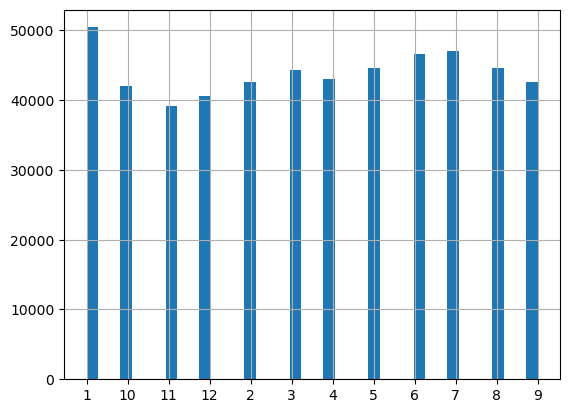

In [133]:
a = df_bdate['month_bdate'].sort_values()
a.hist(bins=40)

Можно увидеть, что больше всего людей родились в январе и июле 

Отлично! Теперь выведем средний возраст по сообществам

In [110]:
df_bdate.groupby(
    by=['games'])[['age']].mean().sort_values(by='age', ascending=False)

,age
games,
Федерация компьютерного спорта России,31.449088
MoreGames,27.766455
CYBERSHOKE,27.010872


В федерации компьютерного спорта самый высокий средний возраст, в остальных пабликах он почти одинаковый

In [111]:
df_bdate.groupby(
    by=['sex'])[['age']].mean().sort_values(by='age', ascending=False)

,age
sex,
Female,32.563613
Male,28.258234


Удивительно, но, видимо, женщины увлекающиеся темой киберспорта и видеоигр в среднем старше, чем мужчины, интересующиеся тем же

In [112]:
df_bdate.groupby(
    by=['city'])[['id']].count().sort_values(by='id', ascending=False)

,id
city,
Москва,48614
Санкт-Петербург,16234
Екатеринбург,5064
Новосибирск,4407
Киев,3913
...,...
Княгининок / Маяки,1
Nagpur,1
Кневичи,1


И снова Москва самый масштабный город по подписчикам 

Построим гистограмму и посмотрим распределение подписчиков среди мужчин и женщин

<AxesSubplot:>

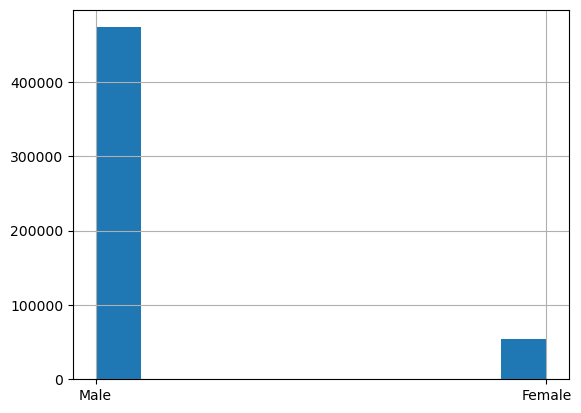

In [113]:
df_bdate['sex'].hist(bins = 10)

Можно увидеть огромную разницу в соотношении полов, так что можно отрицать факт того, что мужчины больше увлекаются компьютерными играми

Давайте посчитаем какой процент от всех пользователей деактивирован, то есть забанен из сообщества или профиль был удален

In [123]:
df_bdate['deactivated'].value_counts()

banned     62073
deleted    21764
Name: deactivated, dtype: int64

In [124]:
df_bdate.shape

(527552, 15)

In [125]:
((62073 + 21764)/527552)*100

15.891703566662624

Итого у нас вышло ~16%, что достаточно много, забаненных пользователей было примерно 62.000, видимо аудитория кибеспортивных сообществ достаточно агрессивная, раз присутствует такое количество банов 